In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [2]:
#The data was obtained from the UCI Machine Learning Repository. Categorical variables were changed to numerical ones in order to facilitate analysis.
obesity = pd.read_csv('obesity.csv')

In [3]:
#inspect the data
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [4]:
#Split the data in two parts: The predictor varables and outcome variable
X = obesity.iloc[:, :-1]
y = obesity.iloc[:,-1]

In [6]:
# Create a logistic regression model
lr = LogisticRegression()

# Fit the logistic regression model

lr.fit(X,y)


/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Print the accuracy of the model

print(lr.score(X,y))
# Create a sequential forward selection model
sfs = SFS(lr,k_features=9, scoring='accuracy', floating=False, forward = True, cv = 0)

# Fit the sequential forward selection model to X and y
sfs.fit(X,y)

# Inspect the results of sequential forward selection
print(sfs.subsets_)




0.7645665561345334


/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

{1: {'feature_idx': (2,), 'cv_scores': array([0.63524396]), 'avg_score': 0.635243960208432, 'feature_names': ('family_history_with_overweight',)}, 2: {'feature_idx': (2, 6), 'cv_scores': array([0.69872099]), 'avg_score': 0.6987209853150166, 'feature_names': ('family_history_with_overweight', 'CAEC')}, 3: {'feature_idx': (2, 3, 6), 'cv_scores': array([0.74040739]), 'avg_score': 0.7404073898626243, 'feature_names': ('family_history_with_overweight', 'FAVC', 'CAEC')}, 4: {'feature_idx': (2, 3, 6, 9), 'cv_scores': array([0.74798674]), 'avg_score': 0.7479867361440076, 'feature_names': ('family_history_with_overweight', 'FAVC', 'CAEC', 'SCC')}, 5: {'feature_idx': (2, 3, 6, 9, 10), 'cv_scores': array([0.7565135]), 'avg_score': 0.7565135007105637, 'feature_names': ('family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}, 6: {'feature_idx': (1, 2, 3, 6, 9, 10), 'cv_scores': array([0.76930365]), 'avg_score': 0.7693036475603979, 'feature_names': ('Age', 'family_history_with_overweight', 

('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
0.7835149218379914


/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

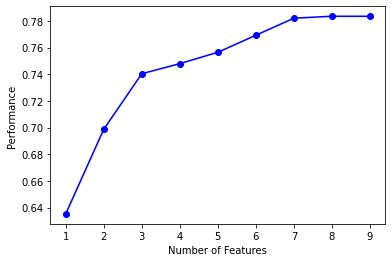

In [10]:

# See which features sequential forward selection chose
print(sfs.subsets_[9]['feature_names'])

# Print the model accuracy after doing sequential forward selection
print(sfs.subsets_[9]['avg_score'])


# Plot the model accuracy as a function of the number of features used
plot_sfs(sfs.get_metric_dict())



In [11]:

# Create a sequential backward selection model
sbs  = SFS(lr, k_features=7, scoring='accuracy', floating=False, forward =False, cv=0)

# Fit the sequential backward selection model to X and y
sbs.fit(X,y)

# Inspect the results of sequential backward selection
print(sbs.subsets_)


/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

{18: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), 'cv_scores': array([0.76456656]), 'avg_score': 0.7645665561345334, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking')}, 17: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17), 'cv_scores': array([0.76977736]), 'avg_score': 0.7697773567029844, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking')}, 16: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17), 'cv_scores': array([0.76930365]), 'avg_score': 0.7693036475603979, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'TU

('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')
0.7640928469919469


/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/maria/Desktop/side_project_main/assignment/data_transformation/menv/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

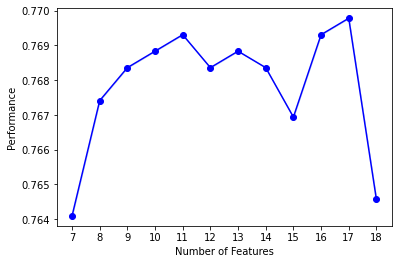

In [14]:

# See which features sequential backward selection chose

print(sbs.k_feature_names_)
# Print the model accuracy after doing sequential backward selection
print(sbs.k_score_)

# Plot the model accuracy as a function of the number of features used
plot_sfs(sbs.get_metric_dict())


In [15]:

# Get feature names

feature_names = list(obesity.columns)
# Standardize the data
sc = StandardScaler()
X = pd.DataFrame(StandardScaler().fit_transform(X))


In [25]:
# Create a recursive feature elimination model

rfe = RFE(lr, n_features_to_select=8)
# Fit the recursive feature elimination model to X and y
rfe.fit(X,y)

# See which features recursive feature elimination chose
print([el for (el, el1) in zip(feature_names, rfe.support_) if el1])

# Print the model accuracy after doing recursive feature elimination
print(rfe.score(X,y))

['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']
0.7678825201326386
